# Grip Strength Analysis

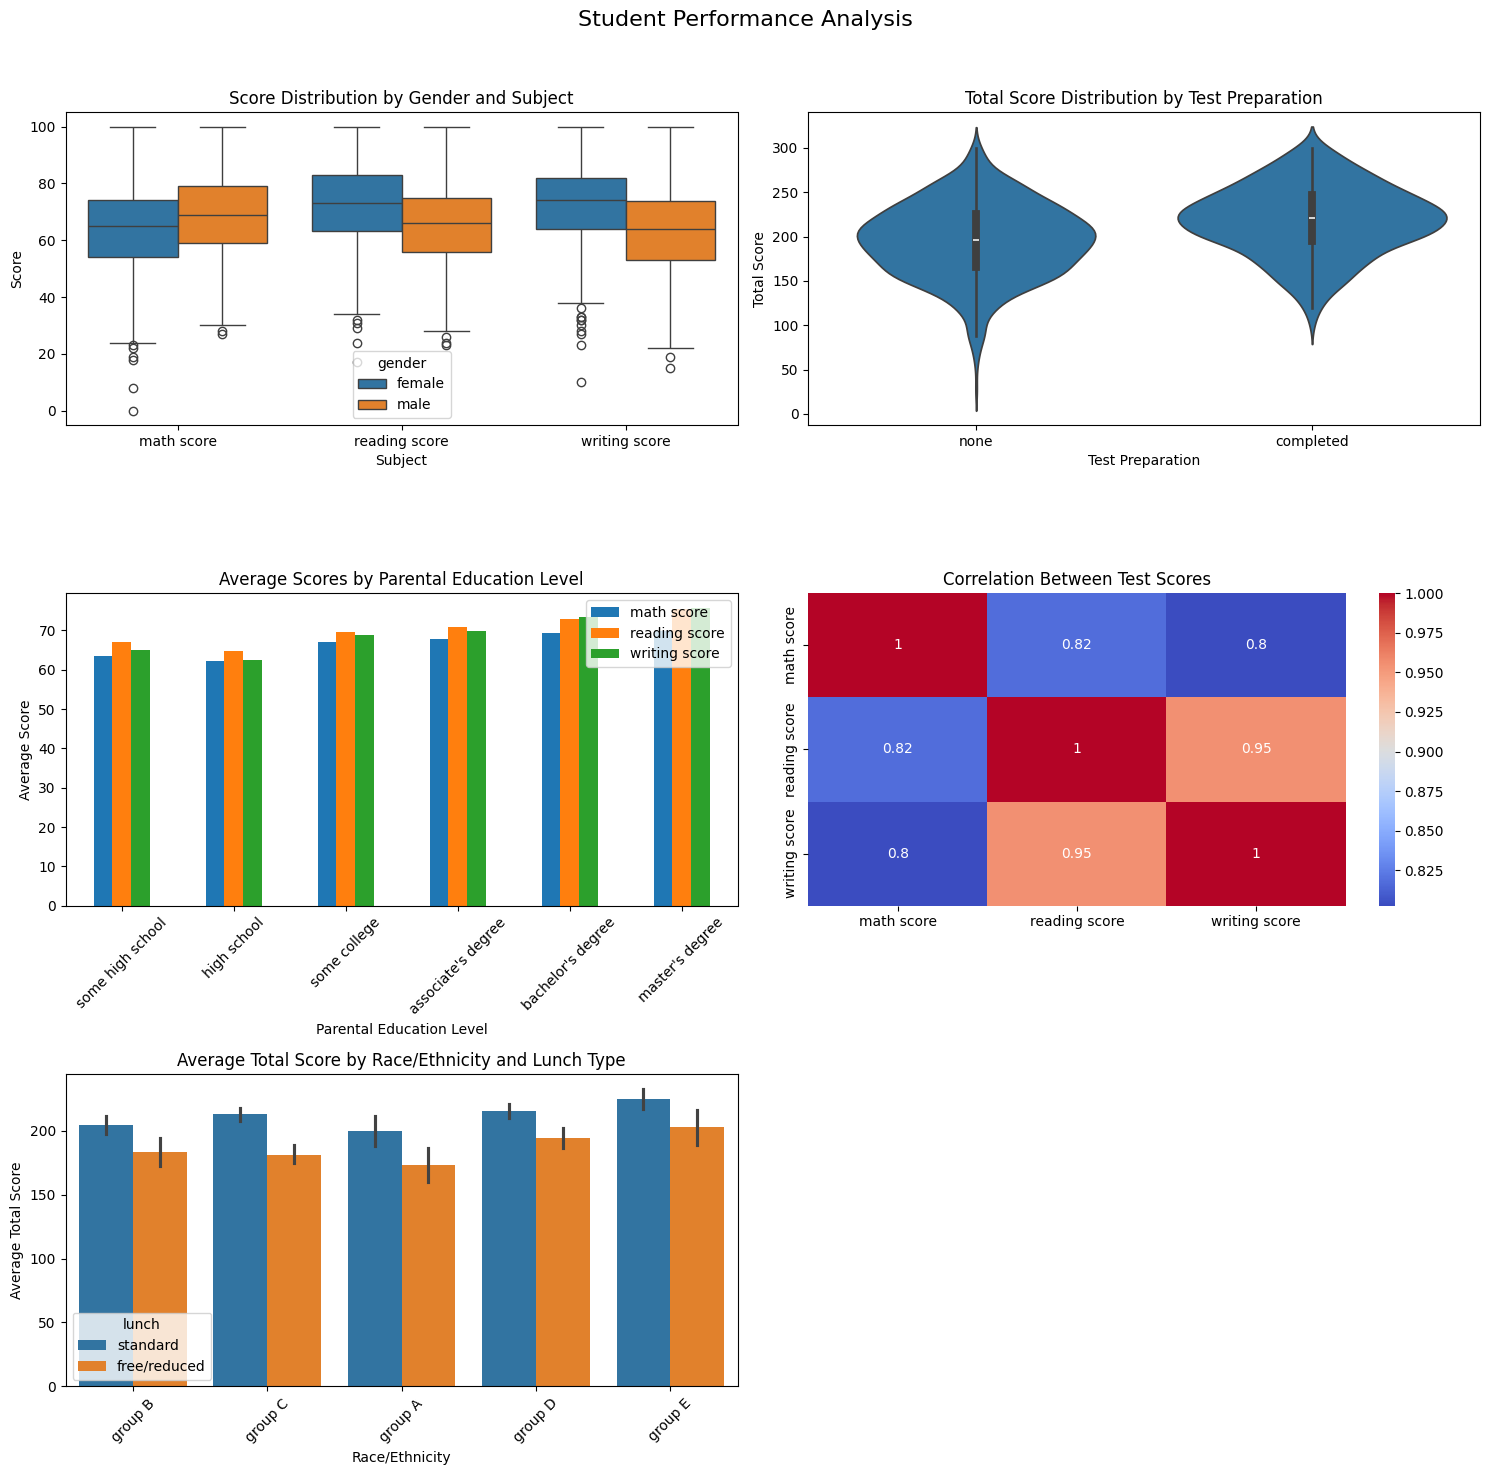

In [ ]:
# Student Performance Visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('Question2/StudentsPerformance.csv')


fig, axes = plt.subplots(3, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)

# Visualization 1: Gender-based score comparison (box plot)
df_melt = pd.melt(df, id_vars=['gender'], value_vars=['math score', 'reading score', 'writing score'],
                 var_name='subject', value_name='score')
sns.boxplot(x='subject', y='score', hue='gender', data=df_melt, ax=axes[0, 0])
axes[0, 0].set_title('Score Distribution by Gender and Subject')
axes[0, 0].set_xlabel('Subject')
axes[0, 0].set_ylabel('Score')

# Visualization 2: Score distribution by test preparation
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
sns.violinplot(x='test preparation course', y='total score', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Total Score Distribution by Test Preparation')
axes[0, 1].set_xlabel('Test Preparation')
axes[0, 1].set_ylabel('Total Score')

# Visualization 3: Scores by parental education level
education_order = ['some high school', 'high school', 'some college',
                   'associate\'s degree', 'bachelor\'s degree', 'master\'s degree']
mean_scores = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()
mean_scores = mean_scores.reindex(education_order)
mean_scores.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Average Scores by Parental Education Level')
axes[1, 0].set_xlabel('Parental Education Level')
axes[1, 0].set_ylabel('Average Score')
axes[1, 0].tick_params(axis='x', rotation=45)

# Visualization 4: Correlation heatmap of scores
score_cols = ['math score', 'reading score', 'writing score']
corr = df[score_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Correlation Between Test Scores')

# Visualization 5: Score distribution by race/ethnicity and lunch type
sns.barplot(x='race/ethnicity', y='total score', hue='lunch', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Average Total Score by Race/Ethnicity and Lunch Type')
axes[2, 0].set_xlabel('Race/Ethnicity')
axes[2, 0].set_ylabel('Average Total Score')
axes[2, 0].tick_params(axis='x', rotation=45)

axes[2, 1].axis('off')

plt.suptitle('Student Performance Analysis', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('student_performance_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
import shutil
shutil.make_archive("Question2", 'zip', "Question2")

'/content/Question2.zip'